In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import geopandas as gpd
import pandas as pd

In [3]:
def plot_loess_curve(grid, index):
    # Read and transform grid
    grid_gdf = gpd.read_file(f'grids/{grid}km_behrmann_grid.shp')
    grid_gdf = grid_gdf.to_crs(epsg=4326)

    # Read iNEXT results and join the two dataframes by the grid id
    output_df = pd.read_csv(f'iNext_output/{grid}_summary.csv')
    output_df["tile_id"] = output_df["id"]
    grid_gdf = grid_gdf.merge(output_df, on='tile_id')

    # Calculate centroids
    # Ensure CRS is correctly set to Behrmann (ESRI:54017)
    if grid_gdf.crs is None or grid_gdf.crs.to_string() != "ESRI:54017":
        grid_gdf = grid_gdf.to_crs("ESRI:54017")  # Explicitly set Behrmann CRS
    grid_gdf["centroid"] = grid_gdf.geometry.centroid
    centroid_gdf = gpd.GeoDataFrame(geometry=grid_gdf["centroid"], crs=grid_gdf.crs)
    centroid_gdf = centroid_gdf.to_crs(epsg=4326)
    grid_gdf["longitude"] = centroid_gdf.geometry.x
    grid_gdf["latitude"] = centroid_gdf.geometry.y


    # Calculate loess curve
    y = grid_gdf[index].to_numpy()
    x = grid_gdf["latitude"].to_numpy()
    lowess_results = sm.nonparametric.lowess(y, x, frac=0.3)

    # Extract smoothed values
    x_smooth, y_smooth = lowess_results[:, 0], lowess_results[:, 1]

    # Plot the original data and the LOWESS curve
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Raw Data", color="gray", alpha=0.6)
    plt.plot(x_smooth, y_smooth, label="LOWESS Curve", color="red", linewidth=2)
    plt.xlabel("Latitude")
    plt.ylabel(index)
    plt.legend()
    plt.title("LOWESS Curve Example")
    # set y axis to 1 to 50
    plt.ylim(1, 50)
    plt.savefig(f'figures/{grid}_{index}_loess_curve.png')
    plt.show()

    # save figure

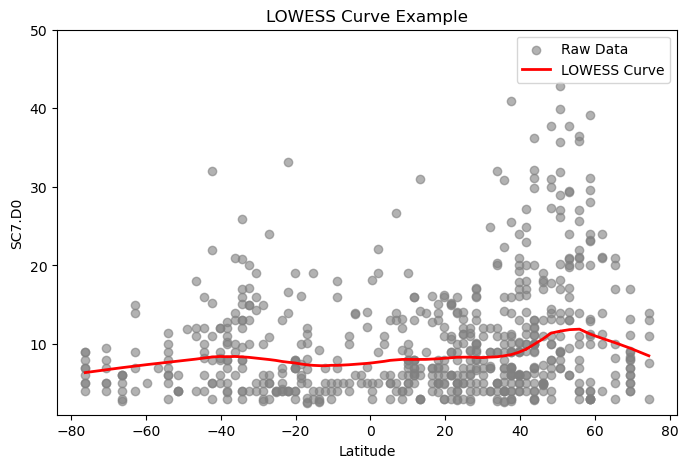

In [5]:
plot_loess_curve("200", "SC7.D0")

In [81]:
import pandas as pd
import geopandas as gpd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def plot_loess_curves(grid, indexes):
    """
    Plots LOWESS curves for multiple indexes for a given resolution.

    :param grid: The resolution of the grid (e.g., '10' for 10km).
    :param indexes: A list of column names to visualize with LOWESS.
    """
    # Read and transform grid
    grid_gdf = gpd.read_file(f'grids/{grid}km_behrmann_grid.shp')
    grid_gdf = grid_gdf.to_crs(epsg=4326)

    # Read iNEXT results and join the two dataframes by the grid id
    output_df = pd.read_csv(f'iNext_output/{grid}_summary.csv')
    output_df["tile_id"] = output_df["id"]
    grid_gdf = grid_gdf.merge(output_df, on='tile_id')

    # Calculate centroids
    if grid_gdf.crs is None or grid_gdf.crs.to_string() != "ESRI:54017":
        grid_gdf = grid_gdf.to_crs("ESRI:54017")  # Explicitly set Behrmann CRS
    grid_gdf["centroid"] = grid_gdf.geometry.centroid
    centroid_gdf = gpd.GeoDataFrame(geometry=grid_gdf["centroid"], crs=grid_gdf.crs)
    centroid_gdf = centroid_gdf.to_crs(epsg=4326)
    grid_gdf["longitude"] = centroid_gdf.geometry.x
    grid_gdf["latitude"] = centroid_gdf.geometry.y

    # Plot setup
    plt.figure(figsize=(10, 6))
    colors = ['red', 'green', 'blue', 'purple']  # Colors for different indexes
    markers = ['D', 'o', 'o', 'o']

    for idx, index in enumerate(indexes):
        y = grid_gdf[index].to_numpy()
        x = grid_gdf["latitude"].to_numpy()
        lowess_results = sm.nonparametric.lowess(y, x, frac=0.3)
        x_smooth, y_smooth = lowess_results[:, 0], lowess_results[:, 1]

        if idx == 0:
            # Scatter plot for raw data
            plt.scatter(x, y, label=f"{index}", color=colors[idx], alpha=0.3, marker=markers[idx], s=25)
        else:
            # Scatter plot for raw data
            plt.scatter(x, y, label=f"{index}", color=colors[idx], alpha=0.3, marker=markers[idx], s=20)

        # LOWESS curve
        plt.plot(x_smooth, y_smooth, color=colors[idx], linewidth=1.5)

    # Labels, legend, and title
    plt.xlabel("Latitude")
    plt.ylabel("Index Values")
    plt.legend()
    plt.title(f"LOWESS Curves for {grid}km Resolution")
    plt.ylim(1, 70)
    plt.xlim(-80, 80)

    # Save and show the figure
    plt.savefig(f'figs_for_submission/{grid}_loess_curves.png')
    plt.show()


# TODOS
- obs.D0 values should be triangle
- Use muted colors from Kusumoto coral reefs
- Use more contrasting colors
- 4 stacked line plots in 2x2
- Make points smaller


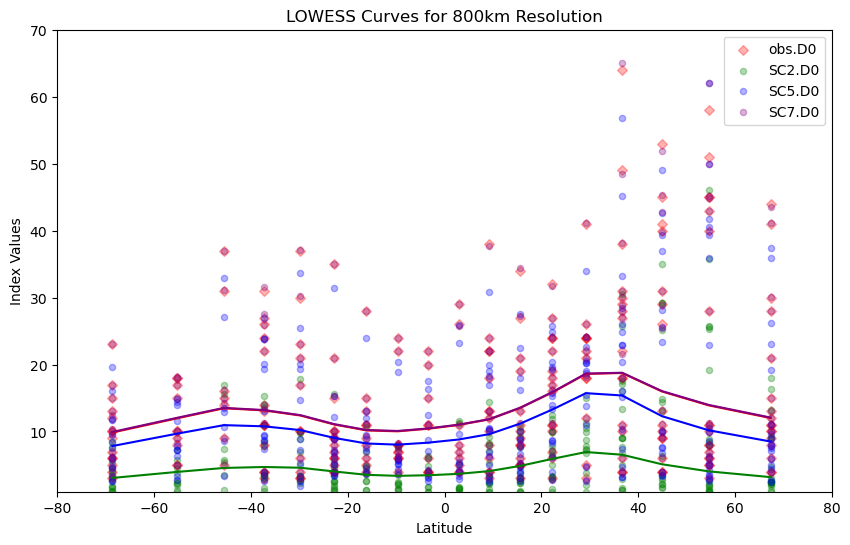

In [85]:
plot_loess_curves("800", ["obs.D0", "SC2.D0", "SC5.D0", "SC7.D0"])